<a href="https://colab.research.google.com/github/ileanacoletta/PF_Ileana_Coletta/blob/main/PF_1_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final Data Science - 1ra Entrega
##"Conjunto de datos sobre la vivienda en Miami"
###Profesor: Jorge Ruiz
###Tutora: Ana Sendon
###Alumna: Ileana Coletta
###Comisión: 61720

#**Abstract**#
Este proyecto tiene como objetivo doble: realizar un análisis exploratorio de un conjunto de datos sobre viviendas en Miami y desarrollar un modelo predictivo de precios.

El conjunto de datos, que abarca 13,932 transacciones, incluye información detallada sobre las características de las propiedades y su entorno. A través de este análisis, se busca comprender los factores que determinan el valor de las viviendas en Miami y construir un modelo capaz de estimar los precios de venta con precisión. Los resultados de este estudio pueden ser de gran utilidad para agentes inmobiliarios, inversores y urbanistas.

#**Marco del Problema**
El contexto analítico de este estudio se centra en el mercado inmobiliario de Miami, un sector altamente dinámico y complejo influenciado por una variedad de factores económicos, demográficos y geográficos.

El problema comercial subyacente radica en la necesidad de desarrollar herramientas y modelos que permitan a agentes inmobiliarios, inversores y tomadores de decisiones comprender mejor los determinantes de los precios de las viviendas en esta región.

Al identificar los factores que más influyen en el valor de las propiedades, se pueden desarrollar estrategias de inversión más efectivas, optimizar los procesos de valoración y brindar a los compradores y vendedores una mejor comprensión del mercado.



#**Fuente**
El dataset escogido fue encontrado en Kaggle y puede ser ubicado a través del siguiente [enlace](https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset/data).


# Obtencion de los datos

In [29]:
""" importar librerias:
panda
numpy
matplotlib
seaborn
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
'''
OPTATIVO (USA MUCHA MEMORIA)

Configurar Pandas para mostrar todas las filas
pd.set.option('display.max_rows', None)

Configurar Pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
'''

In [16]:
#importar csv
#metodo panda pd.read_csv
df= pd.read_csv("https://raw.githubusercontent.com/ileanacoletta/PF_Ileana_Coletta/refs/heads/main/miami-housing.csv")
df

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


#Definicion de variables#

El conjunto de datos contiene información sobre **13,932 viviendas familiares** vendidas en Miami.

El conjunto de datos contiene las siguientes columnas:

1. PARCELNO: identificador único de cada propiedad.
2. SALE_PRC: precio de venta (USD)
3. LND_SQFOOT: área del terreno (SQF)
4. TOT_LVG_AREA: área del piso (SQF)
5. SPEC_FEAT_VAL: valor de las características especiales
6. RAIL_DIST: distancia a la línea ferroviaria más cercana como un indicador de ruido (pies)
7. OCEAN_DIST: distancia al océano (pies)
8. WATER_DIST: distancia al cuerpo de agua más cercano (pies)
9. CNTR_DIST: distancia al distrito comercial central de Miami (pies)
10. SUBCNTR_DI: distancia al subcentro más cercano (pies)
11. HWY_DIST: distancia a la autopista más cercana (un indicador de ruido) (pies)
12. edad: edad de la estructura
13. avno60plus: variable ficticia para el ruido de los aviones que excede un nivel aceptable
14. structure_quality: calidad de la estructura
15. month_sold: mes de venta en 2016 (1 = ene)
16. LATITUD
17. LONGITUD

Fuente: https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset

In [ ]:
'''
en caso de querer cambiar las columnas al espanol
df.columns = [
    "id_parcela",
    "precio_venta",
    "superficie_terreno",
    "superficie_cubierta",
    "valor_adicionales",
    "distancia_via_ferrea",
    "distancia_oceano",
    "distancia_agua",
    "distancia_centro",
    "distancia_subcentro",
    "distancia_autopista",
    "antiguedad",
    "ruido_avion",
    "calidad_construccion",
    "mes_venta",
    "latitud",
    "longitud",
]
'''

In [17]:
df

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


# Informacion del Dataset

In [4]:
#metodo LEN - total de elementos (filas/registros) que tenemos
len(df)

13932

In [ ]:
#age.count  cuenta cosas que no son nulas
df.age.count()

13932

In [ ]:
#informacion de todas las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [ ]:
#verificar valores nulos
print("\nValores nulos en el conjunto de datos:")
print(df.isnull().sum())


Valores nulos en el conjunto de datos:
LATITUDE             0
LONGITUDE            0
PARCELNO             0
SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
dtype: int64


En esta primera etapa, se puede apreciar que no se encuentran valores faltantes.

In [ ]:
#metodo UNIQUE - cuantas clases tenemos de una variable
df.PARCELNO.unique()

array([622280070620, 622280100460, 622280100470, ..., 131320040420,
       131320040330, 131320040700])

In [ ]:
#metodo UNIQUE - pero para saber cantidad de clases de esa variable
df.PARCELNO.nunique()

13776

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [18]:
cardinalidad = pd.DataFrame({'Cantidad' :df.nunique(), 'Porcentaje' :(df.nunique())/(df.shape[0]*(100))})
cardinalidad

,Cantidad,Porcentaje
LATITUDE,13776,0.009888
LONGITUDE,13776,0.009888
PARCELNO,13776,0.009888
SALE_PRC,2111,0.001515
LND_SQFOOT,4696,0.003371
TOT_LVG_AREA,2978,0.002138
SPEC_FEAT_VAL,7583,0.005443
RAIL_DIST,13235,0.009500
OCEAN_DIST,13617,0.009774
WATER_DIST,13218,0.009488


Las columnas 'avno60plus' (2 valores unicos), 'month_sold'(12 valores unicos), y 'structure_quality' (5 valores unicos) tienen una cardinalidad baja, lo que podria corresponder a variables categoricas.

In [ ]:
"""
CORRECCION = cambiar variables a categoricas
df['age'] = pd.Categorical(df['age'], ordered=True)
df['month_sold'] = pd.Categorical(df['month_sold'], ordered=True)
df['avno60plus'] = pd.Categorical(df['avno60plus'], ordered=True)
df['structure_quality'] = pd.Categorical(df['structure_quality'], ordered=True)
"""

# <font color='magenta'> **CONSULTA referente a la CORRECCION (en la linea anterior):** seria realmente conveniente cambiar las variables a categoricas de: age, month_sold, avno60plus, y structure_quality ?

In [6]:
# Obtener la cantidad de registros por cada valor único de PARCELNO
PARCELNO_counts = df.PARCELNO.value_counts()
df.PARCELNO.value_counts()

,count
PARCELNO,
3031150056160,3
131240200610,3
3049101290060,3
3022200023090,3
3049210203360,2
...,...
341300081101,1
341300080670,1
341300080820,1


El objetivo de buscar los registros unicos del PARCELNO es para identificar las propiedades que tienen registro multiplos lo cual podría indicar operaciones de inversión inmobiliaria o transacciones realizadas con fines de remodelación y reventa rápida, o posibles errores o inconsistencias en la base de datos.

Por ese motivo, el siguiente paso es eliminar los registros duplicados correspondientes a los PARCELNO, ya que el objetivo final es entrenar al modelo a estimar el precio de venta.
  

In [19]:
# Obtener los valores de PARCELNO que se repiten más de una vez
duplicados = PARCELNO_counts[PARCELNO_counts > 1].index

# Filtrar el DataFrame original para eliminar los duplicados
df_sin_duplicados = df[~df['PARCELNO'].isin(duplicados)]

# Mostrar el DataFrame sin duplicados
print(df_sin_duplicados)

        LATITUDE  LONGITUDE      PARCELNO  SALE_PRC  LND_SQFOOT  TOT_LVG_AREA  \
0      25.891031 -80.160561  622280070620  440000.0        9375          1753   
1      25.891324 -80.153968  622280100460  349000.0        9375          1715   
2      25.891334 -80.153740  622280100470  800000.0        9375          2276   
3      25.891765 -80.152657  622280100530  988000.0       12450          2058   
4      25.891825 -80.154639  622280100200  755000.0       12800          1684   
...          ...        ...           ...       ...         ...           ...   
13927  25.783130 -80.259795  131320040990  275000.0        6780           967   
13928  25.783585 -80.260354  131320040910  340000.0        7500          1854   
13929  25.783793 -80.256126  131320040420  287500.0        8460          1271   
13930  25.784007 -80.257542  131320040330  315000.0        7500          1613   
13931  25.784387 -80.258901  131320040700  250000.0        8833          1867   

       SPEC_FEAT_VAL  RAIL_

In [8]:
#metodo LEN - total de elementos (filas/registros) que tenemos
len(df_sin_duplicados)

13624

El dataset 'df' tiene 13932 registros, mientras que el "df_sin_duplicados' tiene 13624; esto implica que en el 'df_sin_duplicados' se han removido 308 PARCELNO duplicados o 2.21%

La eliminación de un 2.21% de los registros debido a duplicados es un porcentaje relativamente pequeño y es probable que tenga un impacto limitado en los resultados del análisis.

In [20]:
#metodo DESCRIBE - metodo de Pandas que genera estadisticas descriptivas del DataFrame
#DataFrame original
df.describe().round(1)

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.0,13932.0,1.393200e+04,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0,13932.0
mean,25.7,-80.3,2.356496e+12,399941.9,8620.9,2058.0,9562.5,8348.5,31691.0,11960.3,68490.3,41115.0,7723.8,30.7,0.0,6.7,3.5
std,0.1,0.1,1.199290e+12,317214.7,6070.1,813.5,13891.0,6178.0,17595.1,11933.0,32008.5,22161.8,6068.9,21.2,0.1,3.3,1.1
min,25.4,-80.5,1.020008e+11,72000.0,1248.0,854.0,0.0,10.5,236.1,0.0,3825.6,1462.8,90.2,0.0,0.0,1.0,1.0
25%,25.6,-80.4,1.079160e+12,235000.0,5400.0,1470.0,810.0,3299.4,18079.4,2675.8,42823.1,23996.2,2998.1,14.0,0.0,4.0,2.0
50%,25.7,-80.3,3.040300e+12,310000.0,7500.0,1877.5,2765.5,7106.3,28541.8,6922.6,65852.4,41109.9,6159.8,26.0,0.0,7.0,4.0
75%,25.9,-80.3,3.060170e+12,428000.0,9126.2,2471.0,12352.2,12102.6,44310.6,19200.0,89358.3,53949.4,10854.2,46.0,0.0,9.0,4.0
max,26.0,-80.1,3.660170e+12,2650000.0,57064.0,6287.0,175020.0,29621.5,75744.9,50399.8,159976.5,110553.8,48167.3,96.0,1.0,12.0,5.0


In [21]:
#DataFrame sin duplicados
df_sin_duplicados.describe().round(1)

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13624.0,13624.0,1.362400e+04,13624.0,13624.0,13624.0,13624.0,13624.0,13624.0,13624.0,13624.0,13624.0,13624.0,13624.0,13624.0,13624.0,13624.0
mean,25.7,-80.3,2.359013e+12,402235.4,8626.6,2064.9,9645.4,8360.2,31732.0,12029.0,68756.5,41183.1,7739.0,30.5,0.0,6.7,3.5
std,0.1,0.1,1.198051e+12,318353.4,6056.0,815.1,13955.4,6172.9,17624.8,11949.2,31973.7,22172.3,6080.3,21.1,0.1,3.3,1.1
min,25.4,-80.5,1.020008e+11,72000.0,1248.0,854.0,0.0,10.5,236.1,0.0,3825.6,1462.8,90.2,0.0,0.0,1.0,1.0
25%,25.6,-80.4,1.079160e+12,235000.0,5400.0,1474.0,825.0,3300.0,18080.6,2690.4,43056.9,24064.1,3004.6,14.0,0.0,4.0,2.0
50%,25.7,-80.3,3.040310e+12,313250.0,7500.0,1885.0,2798.0,7138.7,28653.6,7019.8,66153.5,41196.4,6158.8,26.0,0.0,7.0,4.0
75%,25.9,-80.3,3.060180e+12,430000.0,9150.0,2482.2,13029.0,12110.6,44408.6,19322.4,89828.9,53995.7,10894.9,46.0,0.0,9.0,4.0
max,26.0,-80.1,3.660170e+12,2650000.0,57064.0,6287.0,175020.0,29621.5,75744.9,50399.8,159976.5,110553.8,48167.3,96.0,1.0,12.0,5.0


Los resultados del método describe() proporcionan una primera visión general de los datos.

En general, las medidas estadísticas son similares entre ambos DataFrames, lo que sugiere que la eliminación de duplicados no ha alterado significativamente la distribución de los datos.

Sin embargo, para obtener una compresion mas completa de los datos y realizar inferencias mas precisas, seria necesario un análisis más detallado, incluyendo visualizaciones y pruebas estadisticas.

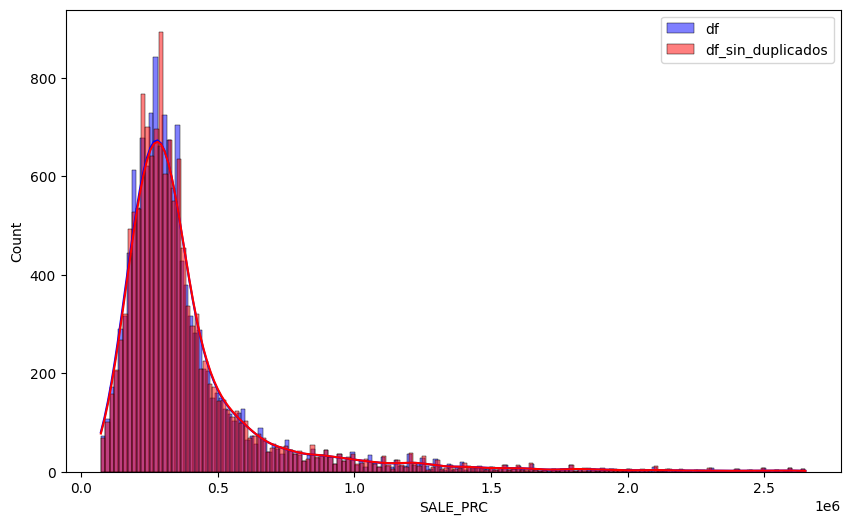

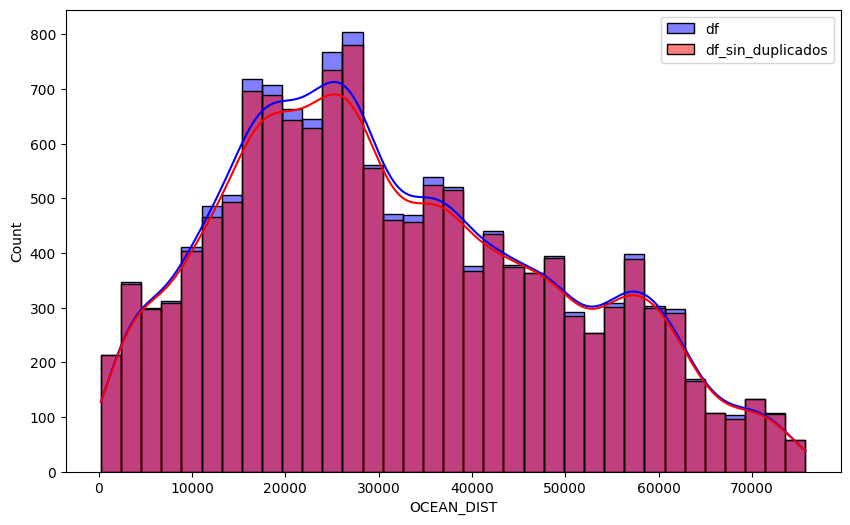

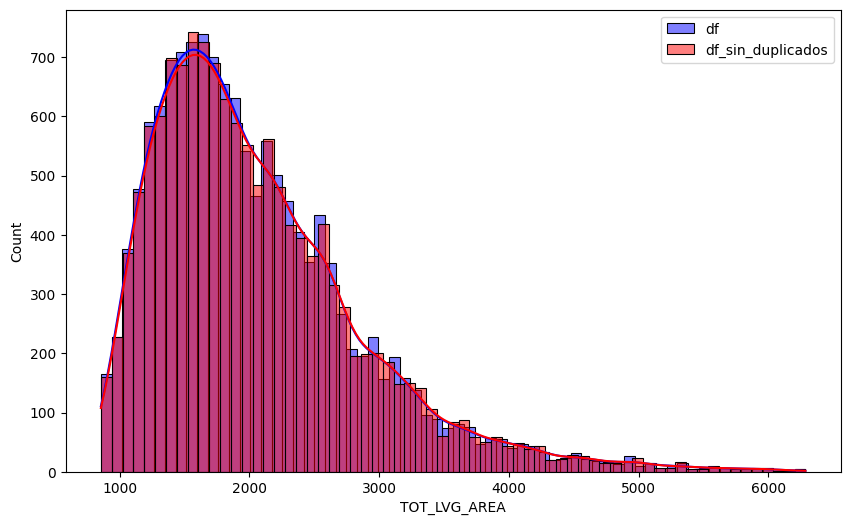

In [ ]:
# Histograma comparativo de la columna 'SALE_PRC'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='SALE_PRC', color='blue', label='df', kde=True)
sns.histplot(data=df_sin_duplicados, x='SALE_PRC', color='red', label='df_sin_duplicados', kde=True)
plt.legend()
plt.show()

# Histograma comparativo de la columna 'OCEAN_DIST'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='OCEAN_DIST', color='blue', label='df', kde=True)
sns.histplot(data=df_sin_duplicados, x='OCEAN_DIST', color='red', label='df_sin_duplicados', kde=True)
plt.legend()
plt.show()

# Histograma comparativo de la columna 'TOT_LVG_AREA'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TOT_LVG_AREA', color='blue', label='df', kde=True)
sns.histplot(data=df_sin_duplicados, x='TOT_LVG_AREA', color='red', label='df_sin_duplicados', kde=True)
plt.legend()
plt.show()

Al analizar los histogramas comparativos de las columna 'SALE_PRC', 'OCEAN_DIST', y 'TOTAL_LVG_AREA' podemos apreciar las siguientes observaciones:

1. 'SALE_PRC'

* Forma similar de las distribuciones: Ambas distribuciones parecen seguir una forma similar, con una asimetría positiva (cola a la derecha).
* Diferencias en la frecuencia: La distribución del DataFrame sin duplicados tiende a tener una frecuencia ligeramente menor en la mayoría de los intervalos, especialmente en la parte superior del rango. Esto indica que al eliminar los duplicados, se han eliminado algunos de los valores más altos de 'SALE_PRC'.

2. 'OCEAN_DIST'

* Forma similar de las distribuciones: Ambas distribuciones presentan una forma similar, con una ligera asimetría positiva.
* Mismo patrón general: A pesar de las diferencias en frecuencia, el patrón general de la distribución se mantiene similar en ambos casos. Esto sugiere que la eliminación de los duplicados no ha alterado significativamente la distribución general de las distancias al océano.



3. 'TOTAL_LVG_AREA'
* La eliminación de duplicados no ha sesgado significativamente la distribución del área total de vivienda.
* El patrón general de la distribución se mantiene consistente.

Conclusion:
El histograma comparativo muestra que la eliminación de los duplicados **no afectó significativamente** la distribución de las áreas de las propiedades.


##Conclusiones:

El histograma comparativo de la columna 'SALE_PRC' sugiere que la eliminación de los duplicados ha tenido un **impacto relativamente pequeño** en la distribución general de los precios de venta.

El histograma comparativo de la columna 'OCEAN_DIST' sugiere que la eliminación de los duplicados tuvo un **impacto minimo** en la distribucion de la variable 'OCEAN_DIST'.

El histograma comparativo de la columna 'TOTAL_LVG_AREA' muestra que la eliminación de los duplicados **no afectó significativamente** la distribución de las áreas de las propiedades.

<ipython-input-22-81534ae49eac>:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='structure_quality', columns='TOT_LVG_AREA_grouped', values='SALE_PRC', aggfunc='mean')


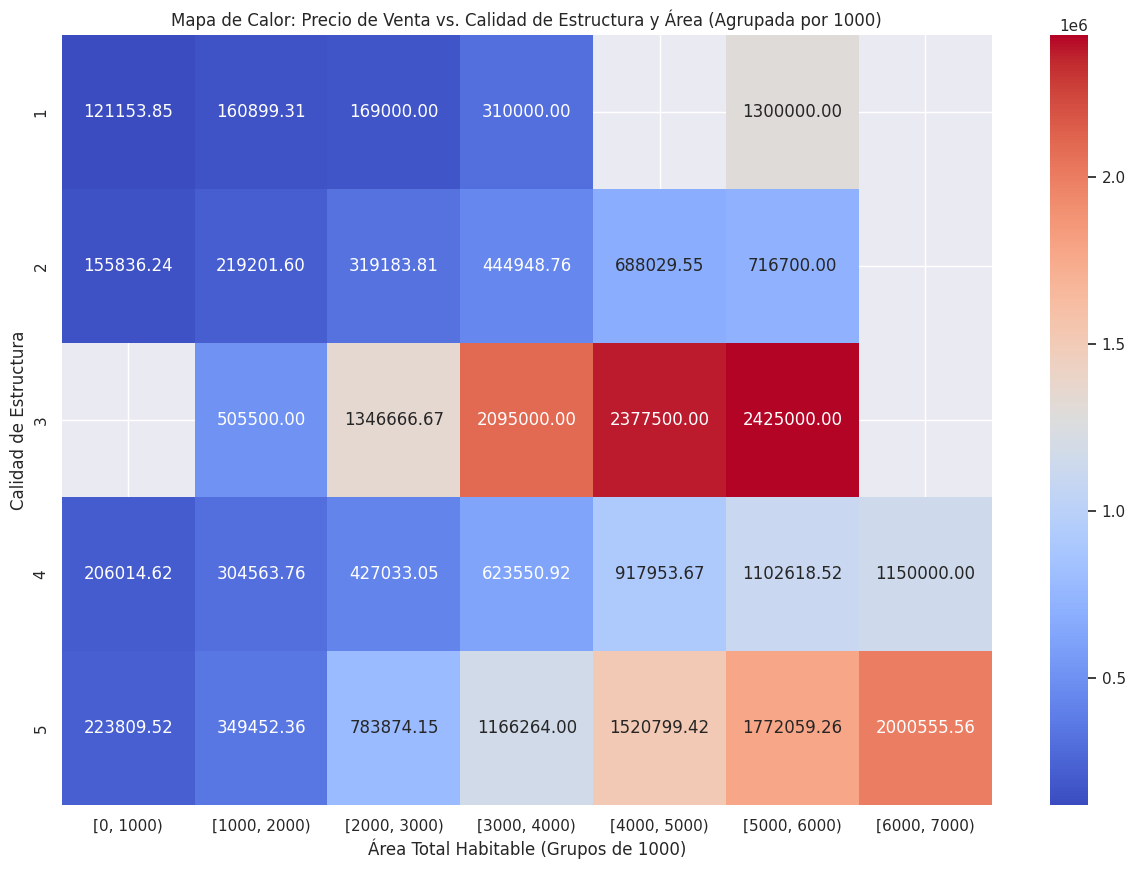

In [22]:
# Discretizar el área total habitable en intervalos de 1000
df['TOT_LVG_AREA_grouped'] = pd.cut(df['TOT_LVG_AREA'], range(0, df['TOT_LVG_AREA'].max() + 1000, 1000), right=False)

# Pivotar los datos con las nuevas categorías
pivot_table = df.pivot_table(index='structure_quality', columns='TOT_LVG_AREA_grouped', values='SALE_PRC', aggfunc='mean')

# Crear el mapa de calor
sns.set(rc={'figure.figsize': (15, 10)})
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm')

# Personalizar el gráfico (opcional)
plt.title('Mapa de Calor: Precio de Venta vs. Calidad de Estructura y Área (Agrupada por 1000)')
plt.xlabel('Área Total Habitable (Grupos de 1000)')
plt.ylabel('Calidad de Estructura')

plt.show()

En el mapa de calor encontramos que se da una concentracion de los precios mas altos en la Calidad de Estructura 3, a pesar de que las 4 y 5 se consideren de mayor calidad.

Posibles motivos:
* Es posible que ciertas caracteristicas valoradas por los compradores, como la ubicacion o distancia al mar, esten mas concentradas en las propiedades de calidad 3, lo que compense una menor calidad de construccion.
* Las propiedades de calidad 3 podrian estar ubicadas en zonas con mayor demanda, lo que impulsa precios de ventas en alza.
* Las propiedades de calidad 3 podrian tener caracteristicas adicionales, como piletas, o terrenos mas grandes, que justifiquen un precio mas elevado.
* Las propiedades de calidad 3 podrian haberse vendido en un momento en el que el mercado inmobiliario estaba mas activo o en el que esitian menos opciones de compra en otras categorias.

<font color='red'> ¿Cuál es el motivo para agrupar? ¿Con qué objetivo?

<font color='magenta'>Borre el agrupamiento, ya que generaba confusion.

<font color='magenta'> Creo que habria que borrar los siguientes codigos y graficos. Tienes razon con las agrupaciones (la verdad que no estoy segura porque las hice). De la misma manera con las hipotesis, las simplifique y, en adicion, borre las hipotesis nulas. No me quiero complicar mas de lo necesario porque puedo confundir conceptos.

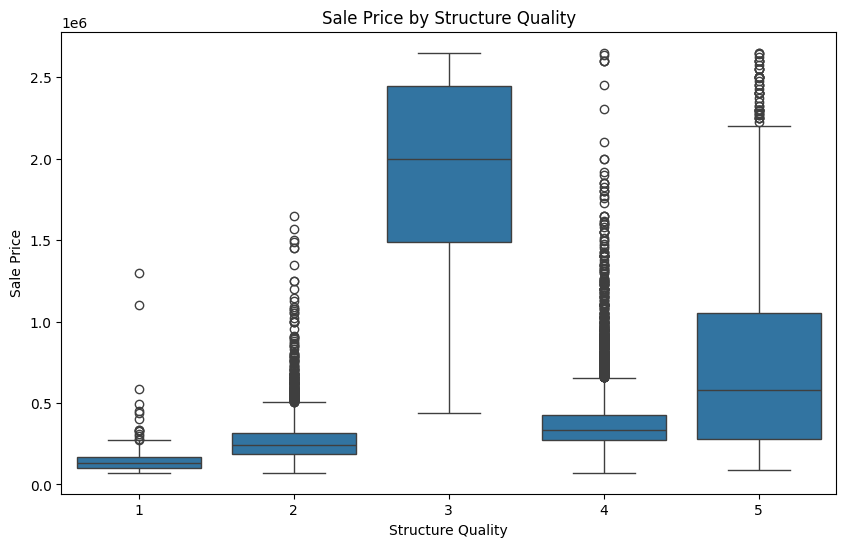

In [11]:
# @title Sale Price by Structure Quality

plt.figure(figsize=(10, 6))
sns.boxplot(x='structure_quality', y='SALE_PRC', data=df)
plt.title('Sale Price by Structure Quality')
plt.xlabel('Structure Quality')
_ = plt.ylabel('Sale Price')

El boxplot confirma la tendencia observada en el mapa de calor que es que la calidad de la estructura es un factor importante que influye en el precio de venta de una propiedad, pero no es el único.

<font color='red'> ¿Por qué no trabajar con el dataset completo?:

In [ ]:
df.structure_quality.value_counts()

,count
structure_quality,
4,7625
2,4110
5,2002
1,179
3,16


<font color='red'> De nuevo, ¿cuál es el objetivo al agrupar? ¿Por qué no trabajar con el dataset completo?

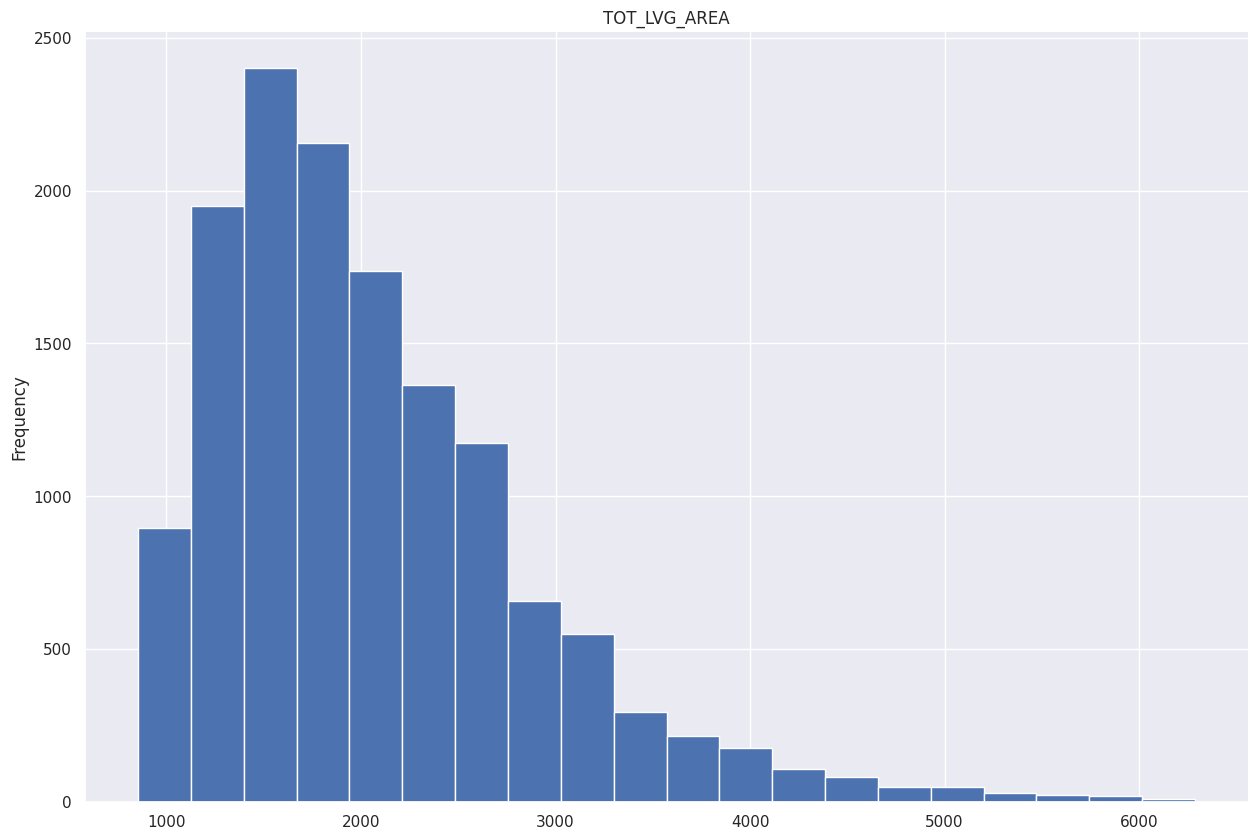

In [23]:
# @title TOT_LVG_AREA

df['TOT_LVG_AREA'].plot(kind='hist', bins=20, title='TOT_LVG_AREA')
plt.gca().spines[['top', 'right',]].set_visible(False)

<font color='red'> No es necesario ni recomendable volver a importar las librerías más de una vez


<font color='MAGENTA'> CORREGIDO

<Axes: >

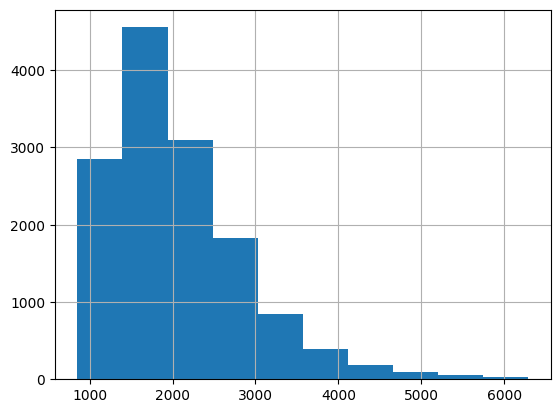

In [ ]:
df['TOT_LVG_AREA'].hist()

Podemos apreciar asimetria a la derecha. La media es mayor a la mediana.

In [24]:
# calcular el coeficiente de variacion para cada columna
# SALE_PRC	LND_SQFOOT	TOT_LVG_AREA	SPEC_FEAT_VAL	RAIL_DIST	OCEAN_DIST	WATER_DIST	CNTR_DIST	SUBCNTR_DI	HWY_DIST	age	avno60plus	month_sold	structure_quality
coef_var_SALE_PRC = (df['SALE_PRC'].std() / df['SALE_PRC'].mean())*100
coef_var_LND_SQFOOT = (df['LND_SQFOOT'].std() / df['LND_SQFOOT'].mean())*100
coef_var_TOT_LVG_AREA = (df['TOT_LVG_AREA'].std() / df['TOT_LVG_AREA'].mean())*100
coef_var_SPEC_FEAT_VAL = (df['SPEC_FEAT_VAL'].std() / df['SPEC_FEAT_VAL'].mean())*100
coef_var_RAIL_DIST = (df['RAIL_DIST'].std() / df['RAIL_DIST'].mean())*100
coef_var_OCEAN_DIST = (df['OCEAN_DIST'].std() / df['OCEAN_DIST'].mean())*100
coef_var_WATER_DIST = (df['WATER_DIST'].std() / df['WATER_DIST'].mean())*100
coef_var_CNTR_DIST = (df['CNTR_DIST'].std() / df['CNTR_DIST'].mean())*100
coef_var_SUBCNTR_DI = (df['SUBCNTR_DI'].std() / df['SUBCNTR_DI'].mean())*100
coef_var_HWY_DIST = (df['HWY_DIST'].std() / df['HWY_DIST'].mean())*100
coef_var_age = (df['age'].std() / df['age'].mean())*100
coef_var_structure_quality = (df['structure_quality'].std() / df['structure_quality'].mean())*100


# Función para interpretar el coeficiente de variación
def interpretar_cv(cv):
    if cv <= 30:
        return "Los datos de la muestra son relativamente homogéneos, por lo tanto la media ES representativa"
    elif cv <= 70:
        return "Los datos de la muestra son heterogéneos, por lo tanto la media NO ES representativa"
    else:
        return "Los datos de la muestra son muy variables o heterogéneos, por lo cual la media NO ES representativa"

# imprimir los coeficientes de variacion con su interpretacion
print("Coeficiente de variación de SALE_PRC:", coef_var_SALE_PRC, "-", interpretar_cv(coef_var_SALE_PRC))
print("Coeficiente de variación de LND_SQFOOT:", coef_var_LND_SQFOOT, "-", interpretar_cv(coef_var_LND_SQFOOT))
print("Coeficiente de variación de TOT_LVG_AREA:", coef_var_TOT_LVG_AREA, "-", interpretar_cv(coef_var_TOT_LVG_AREA))
print("Coeficiente de variación de SPEC_FEAT_VAL:", coef_var_SPEC_FEAT_VAL, "-", interpretar_cv(coef_var_SPEC_FEAT_VAL))
print("Coeficiente de variación de RAIL_DIST:", coef_var_RAIL_DIST, "-", interpretar_cv(coef_var_RAIL_DIST))
print("Coeficiente de variación de OCEAN_DIST:", coef_var_OCEAN_DIST, "-", interpretar_cv(coef_var_OCEAN_DIST))
print("Coeficiente de variación de WATER_DIST:", coef_var_WATER_DIST, "-", interpretar_cv(coef_var_WATER_DIST))
print("Coeficiente de variación de CNTR_DIST:", coef_var_CNTR_DIST, "-", interpretar_cv(coef_var_CNTR_DIST))
print("Coeficiente de variación de SUBCNTR_DI:", coef_var_SUBCNTR_DI, "-", interpretar_cv(coef_var_SUBCNTR_DI))
print("Coeficiente de variación de HWY_DIST:", coef_var_HWY_DIST, "-", interpretar_cv(coef_var_HWY_DIST))
print("Coeficiente de variación de age:", coef_var_age, "-", interpretar_cv(coef_var_age))
print("Coeficiente de variación de structure_quality:", coef_var_structure_quality, "-", interpretar_cv(coef_var_structure_quality))

Coeficiente de variación de SALE_PRC: 79.31518519105623 - Los datos de la muestra son muy variables o heterogéneos, por lo cual la media NO ES representativa
Coeficiente de variación de LND_SQFOOT: 70.41147540062578 - Los datos de la muestra son muy variables o heterogéneos, por lo cual la media NO ES representativa
Coeficiente de variación de TOT_LVG_AREA: 39.52968490060984 - Los datos de la muestra son heterogéneos, por lo tanto la media NO ES representativa
Coeficiente de variación de SPEC_FEAT_VAL: 145.26512177914077 - Los datos de la muestra son muy variables o heterogéneos, por lo cual la media NO ES representativa
Coeficiente de variación de RAIL_DIST: 74.00121318874754 - Los datos de la muestra son muy variables o heterogéneos, por lo cual la media NO ES representativa
Coeficiente de variación de OCEAN_DIST: 55.52075640077757 - Los datos de la muestra son heterogéneos, por lo tanto la media NO ES representativa
Coeficiente de variación de WATER_DIST: 99.77180422093022 - Los dat

<ipython-input-33-423f75e2c11f>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(pd.cut(df['SALE_PRC'], bins=10))


Text(0.5, 1.0, 'Distribución de la Distancia al Océano por Rango de Precio')

<Figure size 800x600 with 0 Axes>

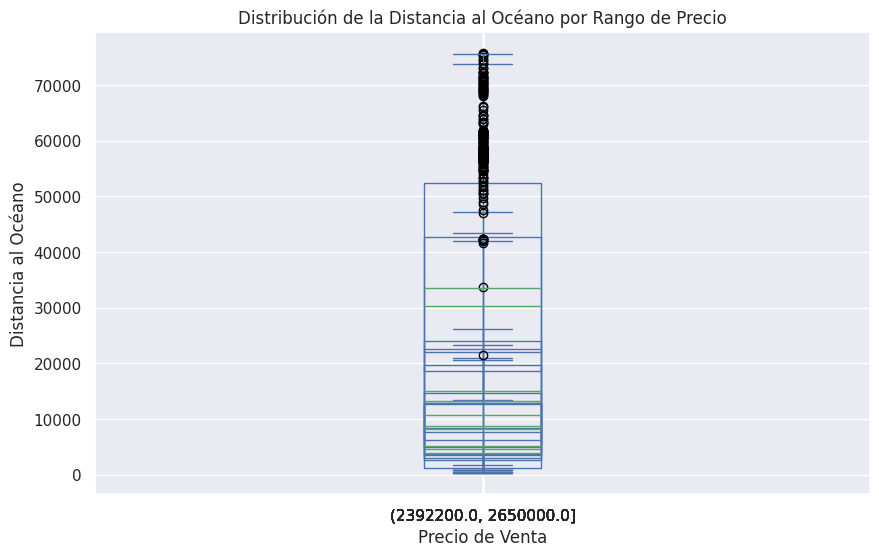

In [33]:
# @title Distribución de la Distancia al Océano por Rango de Precio

# Create a box plot of OCEAN_DIST, grouped by SALE_PRC
plt.figure(figsize=(8, 6))

# Agrupar los datos por rango de precio
df_grouped = df.groupby(pd.cut(df['SALE_PRC'], bins=10))

# Crear un boxplot para cada grupo
plt.figure(figsize=(10, 6))
df_grouped['OCEAN_DIST'].plot(kind='box')

plt.xlabel('Precio de Venta')
plt.ylabel('Distancia al Océano')
plt.title('Distribución de la Distancia al Océano por Rango de Precio')

<font color='red'> Me resulta difícil entender cuál es tu unidad de análisis luego del agrupamiento, ¿qué representa cada fila?

<font color='red'> Si sale_price y ocean_distance son variables continuas, puede resultarte útil hacer un scatterplot para investigar la relación entre ambas:

<Axes: xlabel='SALE_PRC', ylabel='OCEAN_DIST'>

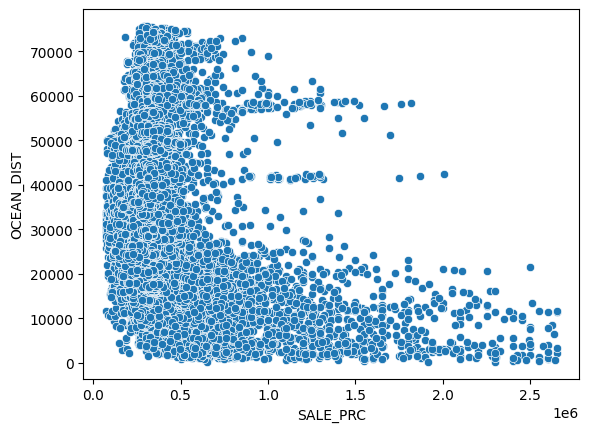

In [ ]:
sns.scatterplot(data=df, x='SALE_PRC', y='OCEAN_DIST')

Observaciones:

* No hay una correlacion lineal fuerte. No se observa una relación lineal clara entre el precio de venta y la distancia al océano. Es decir, no podemos afirmar que a mayor distancia, menor precio, o viceversa.
*  Los puntos están bastante dispersos, lo que sugiere que otros factores además de la distancia al océano influyen significativamente en el precio de las propiedades.
* A simple vista, parece haber algun grupo de puntos en la esquina inferior izquierda, correspondiente a propiedades con precios bajos y distancias cortas al océano. Este grupo podría representar propiedades en zonas urbanas, con edificios más antiguos y menor tamaño.
* Se pueden observar algunos valores atipicos, que no necesariamente sean errores. Estos valores atipicos pueden indicar situaciones especiales, como por ejemplo superficie de terreno,

Para obtener conclusiones mas solidas, es necesario continuar con el analisis.


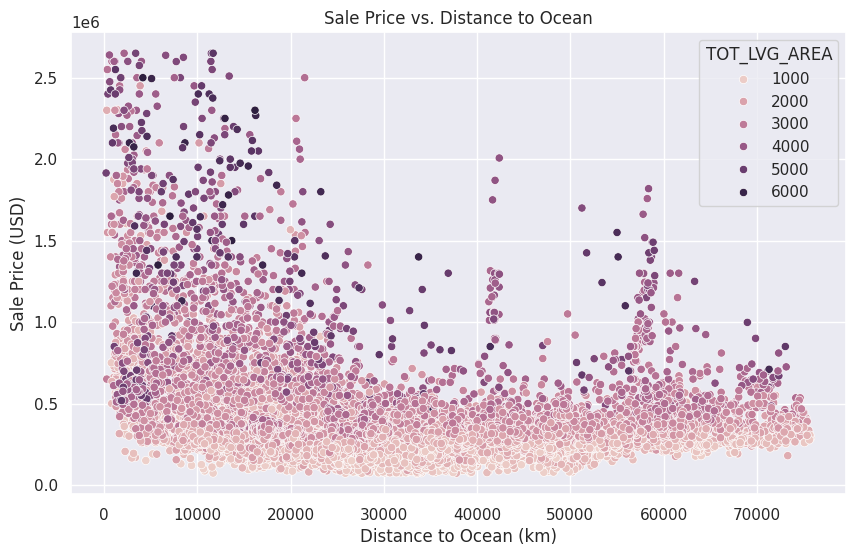

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='OCEAN_DIST', y='SALE_PRC', hue='TOT_LVG_AREA', data=df)
plt.xlabel('Distance to Ocean (km)')
plt.ylabel('Sale Price (USD)')
plt.title('Sale Price vs. Distance to Ocean')
plt.show()

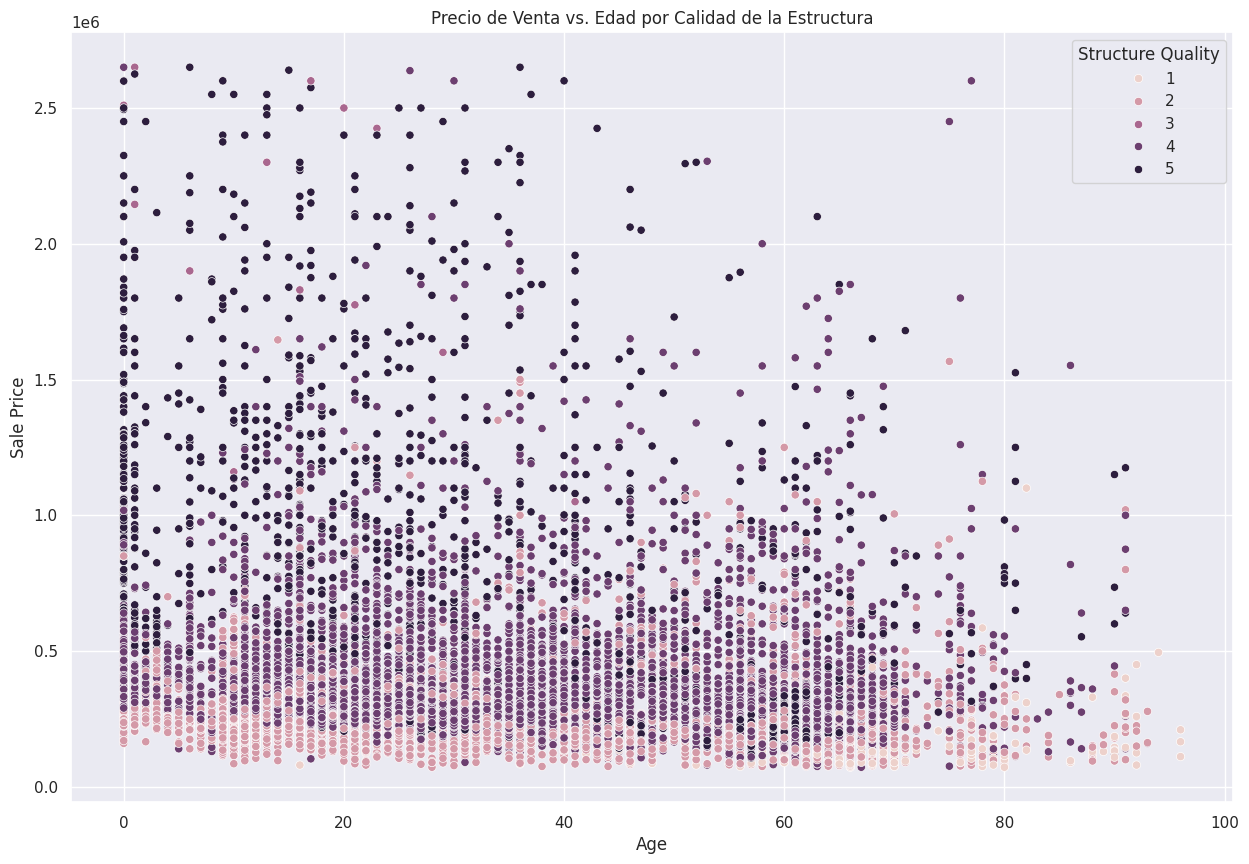

In [39]:
# Crear un  scatterplot
sns.scatterplot(x='age', y='SALE_PRC', hue='structure_quality', data=df)

# Personalizar el scatterplot
plt.title('Precio de Venta vs. Edad por Calidad de la Estructura')
plt.xlabel('Age')
plt.ylabel('Sale Price')
plt.legend(title='Structure Quality')

plt.show()

In [ ]:
#pantallazo - muestra las primeras 5 filas
df.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [ ]:
#pantallazo - muestra los ultimos 5 (por default)
df.tail()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4
13931,25.784387,-80.258901,131320040700,250000.0,8833,1867,266,3793.9,20859.6,3421.0,21928.6,12599.0,474.7,62,0,11,4


In [ ]:
#Submuestra simple (aleatorio)
sub_muestra = df.sample(n=10)
sub_muestra

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
13542,25.596830,-80.435989,3059330260190,335000.0,7725,2526,27194,671.3,41851.6,22301.5,103345.5,52276.9,19273.1,16,0,4,2
13487,25.639490,-80.454000,3059200111140,494000.0,6030,3083,3300,448.6,49282.1,36218.4,99405.8,49571.6,22610.2,0,0,11,4
1164,25.871103,-80.271907,421320070910,262000.0,7409,1335,3676,3812.0,49879.5,6471.3,43025.9,43025.9,16750.7,60,0,12,4
12804,25.678895,-80.445347,3059040610160,295000.0,4050,1748,324,11190.1,51366.3,42885.3,90406.9,43545.9,18594.4,21,0,11,4
1920,25.885933,-80.158534,622280113530,840000.0,8400,2640,1581,4298.3,12301.3,0.0,41208.6,35794.3,16512.8,31,0,8,5
9558,25.521083,-80.407031,3069260170300,175000.0,19162,1152,3285,19968.2,23308.7,18277.7,116589.1,68107.7,1206.6,23,0,5,2
9750,25.532516,-80.385160,3069250160460,323000.0,6461,2172,2240,13670.9,17701.1,11919.2,108992.8,61337.6,929.5,0,0,12,4
2948,25.774106,-80.224750,141030120080,110000.0,3400,1026,595,5660.7,11587.3,2183.7,10560.1,10560.1,2987.0,84,0,3,2
8465,25.558434,-80.399697,3069140120470,416700.0,15000,3689,1840,8064.5,24815.1,9115.1,104512.1,55057.8,11087.2,0,0,3,2
13775,25.610293,-80.429797,3059340060300,280000.0,4620,1456,5000,2180.2,39868.5,23203.0,98722.0,47675.3,16966.5,21,0,12,4


In [ ]:
#submuestra 30% de los datos
sub_muestra_30 = df.sample(frac=0.3)
sub_muestra_30

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
2711,25.809628,-80.290708,2630250210170,285000.0,6000,1256,3407,5463.8,34032.3,5633.9,34352.4,24196.3,8499.8,60,1,9,5
10911,25.948831,-80.297933,3020010072380,225000.0,7500,1397,7592,22840.0,58614.5,5040.7,71449.5,71449.5,7884.7,31,0,3,4
11988,25.733928,-80.400559,3049140100030,470000.0,12675,2748,42586,17562.2,50319.3,23664.0,70075.2,33021.8,5294.8,31,0,7,4
11757,25.758241,-80.421035,3049030080100,300000.0,4563,1855,33298,8873.4,58840.5,28090.0,75407.7,43533.0,6624.0,27,0,3,4
3600,25.761218,-80.268098,3041080190400,515000.0,5350,2567,4126,8806.8,15690.8,6875.6,25415.0,5194.1,7921.4,33,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5443,25.628319,-80.367870,3050190031220,184000.0,7875,930,224,8673.4,20870.0,13479.7,78899.1,28204.9,3701.1,23,0,11,2
903,25.908683,-80.230885,821220060760,101000.0,5000,1118,1430,626.3,35808.4,164.7,49547.6,49547.6,6515.9,66,0,9,2
2140,25.818234,-80.250025,3031210190840,105000.0,5450,1029,0,1907.2,29632.4,4972.8,24119.6,24119.6,2225.7,56,1,1,4
11492,25.781940,-80.414149,3039520380800,376200.0,5606,2427,4420,255.6,59673.1,26697.3,72851.8,47431.2,475.2,16,0,11,4


In [ ]:
#mostrar columnas
df.columns

Index(['LATITUDE', 'LONGITUDE', 'PARCELNO', 'SALE_PRC', 'LND_SQFOOT',
       'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST',
       'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age',
       'avno60plus', 'month_sold', 'structure_quality'],
      dtype='object')

In [ ]:
#forma del dataframe (filas, columnas)
df.shape

(13932, 17)

#Análisis Inicial del Conjunto de Datos

En una primera inspección del conjunto de datos, se observa que la información recopilada sobre las 13,932 propiedades en Miami presenta una alta integridad, dado que no se registran valores faltantes en ninguna de las variables.

Al analizar la distribución de las variables numéricas, como el precio de venta y las distintas dimensiones de las propiedades, se aprecian rangos amplios que reflejan la diversidad del mercado inmobiliario de Miami. Por ejemplo, el precio de venta varía significativamente, con un mínimo de 72,000 USD y un máximo de 2,650,000 USD, lo que sugiere una amplia gama de propiedades, desde viviendas más económicas hasta mansiones de lujo.

La distribución de las propiedades en función de su antigüedad muestra una tendencia interesante: la mediana de la edad de las construcciones es de 26 años. Esto indica que una parte considerable del parque inmobiliario de Miami está compuesto por propiedades relativamente nuevas. Sin embargo, también se encuentran propiedades con una antigüedad considerable, lo que sugiere una mezcla de construcciones de diferentes épocas.

#**Hipotesis**
Estas hipótesis buscan establecer una relación entre ciertas variables (distancia al agua, edad, características especiales) y el precio de venta de las propiedades. Al analizar los datos, se podrá determinar si estas relaciones son estadísticamente significativas y si las hipótesis propuestas son correctas.



**Hipotesis 1**: La proximidad a cuerpos de agua impacta el valor de la propiedad.


**Hipótesis 2**: La edad de una propiedad influye en su precio de venta.


**Hipótesis 3**: La presencia de características específicas  (como piscinas, garajes amplios, vistas panorámicas), que no están directamente relacionadas con su tamaño o ubicación, impactan el valor de la propiedad.


Consideraciones:

Hipótesis 1: Proximidad a cuerpos de agua

Al analizar las variables "OCEAN_DIST", "WATER_DIST" y "SALE_PRC", podemos obtener indicios iniciales sobre la relación entre la cercanía a cuerpos de agua y el precio de venta. La distribución de la distancia al océano (OCEAN_DIST) sugiere una concentración de propiedades relativamente cercanas a la costa. Sin embargo, para corroborar si esta proximidad se traduce en un precio más elevado, será necesario realizar un análisis de correlación más profundo y posiblemente un modelo de regresión.

Hipótesis 2: Edad de la propiedad

La variable "age" proporciona información valiosa para evaluar la relación entre la antigüedad de una propiedad y su precio. La mediana de edad de 26 años indica que el mercado inmobiliario de Miami tiene un mix de propiedades de diferentes épocas. Sin embargo, para determinar si la edad es un factor determinante en el precio, se requiere un análisis más detallado, considerando otras variables como la ubicación y las características específicas de cada propiedad.

Hipótesis 3: Características especiales

La variable "SPEC_FEAT_VAL" es un indicador de las características adicionales de una propiedad. El amplio rango de valores en esta variable sugiere una gran diversidad en términos de amenities y acabados. Para evaluar el impacto de estas características en el precio, será necesario analizar su relación con el precio de venta y controlar por otras variables que puedan influir, como el tamaño de la propiedad o la ubicación.


<font color='red'> No está mal tu razonamiento, pero la estructura de hipótesis nula o alternativa se usa en un tipo muy particular de análisis estadístico, que son las regresiones. En ese caso, el rechazo de la hipótesis nula no se da por un criterio establecido por el analista, sino que se da por los valores p, que indican la probabilidad de que el resultado observado (la relación entre las variables) no sea por azar. Esto también se vincula a la probabilidad de que las relaciones que vemos que se dan en nuestra muestra se repliquen en la población. En este curso se da de manera un poco superficial y por encima, por lo que quería dejar en claro esto. Sí podés establecer tu criterio (si al analizar los datos se encuentra que las propiedades ubicadas a menos de 500 metros de la playa tienen un precio promedio 20% más alto que...), pero no se enmarcaría en el procedimiento de rechazo de hipótesis nula. Si en la segunda parte del curso vas a realizar una regresión lineal para predecir el precio, entonces ese análisis mismo te va a dar en qué medida la distancia con respecto a la playa afecta el precio (los coeficientes de regresión dan la proporción del impacto), y con qué confianza podemos afirmar esto (los p valores). No quiero que te enriedes con esto, lo vamos a ver en la segunda parte y en los módulos siguientes con mayor profundidad, pero me pareció importante mencionarlo. Si te queda alguna duda sobre esto podés escribirme y lo vemos, pero de nuevo, es algo un poco más avanzado.


# Exploracion del dataset

In [ ]:
#metodo VALUE_COUNTS  - analiza variable y cuenta cuantos registros de cada clase
df.PARCELNO.value_counts()

,count
PARCELNO,
3031150056160,3
131240200610,3
3049101290060,3
3022200023090,3
3049210203360,2
...,...
341300081101,1
341300080670,1
341300080820,1


In [ ]:
#PARCELNO con duplicados
print(df['PARCELNO'].value_counts()[df['PARCELNO'].value_counts() >= 2])

PARCELNO
3031150056160    3
131240200610     3
3049101290060    3
3022200023090    3
3049210203360    2
                ..
3050310220540    2
3021230152680    2
3049210200160    2
3040150052070    2
3022320010190    2
Name: count, Length: 152, dtype: int64


El PARCELNO es un identificador unico y cada valor representa una propiedad distinta.

La mayoria de los valores del PARCELNO aparecen una sola vez; sin embargo, hay algunos valores de PARCELNO que aparecen mas de una vez, especificamente 2 y hasta 3 veces. Esto podria indicar:


1.   Errores en los datos: Puede haber duplicados accidentales en los datos,
2.   Multiple registros de la misma propiedad: es posible que haya registros multiples de una misma propiedad o parcela debido a diferentes mediciones en el tiempo,
3.  Agrupaciones de parcelas: los valores que aparecen mas de una vez podrian representar grupos de propiedades o parcelas relacionadas.

La mejor manera de abordar los duplicados en PARCELNO depende de la naturaleza de los datos y objetivos a analizar.

Alguna de las preguntas y consideraciones a tener son:
1. Que impacto tendra la eliminacion de duplicados en los resultados finales? La decision de como tratar los duplicados dependera del contexto especifico de negocio. Por ejemplo, es un analisis de propiedades inmobiliarias con el fin de inversiones o para compra de vivienda primaria.
2. Hay alguna forma de validar la informacion contenida en los registros duplicados? Debido a eliminar los duplicados puede llevar a la perdida de informacion, debemos considerar no solo el contexto especifico de negocio, sino asegurarnos que los beneficios de limpieza superen los costos.

<font color='red'> Podés identificar si hay filas duplicadas con el código de abajo. Habría que ver a qué se refiere una parcela en tu dataset, y si deberían aparecer una sola vez. Como decís vos, puede haber múltiples registros de una propiedad o agrupaciones de parcelas. En todo caso, ver si hay duplicados te puede servir:

In [ ]:
num_duplicados = df.duplicated().sum()
print(f"Hay {num_duplicados} filas duplicadas.")

Hay 0 filas duplicadas.


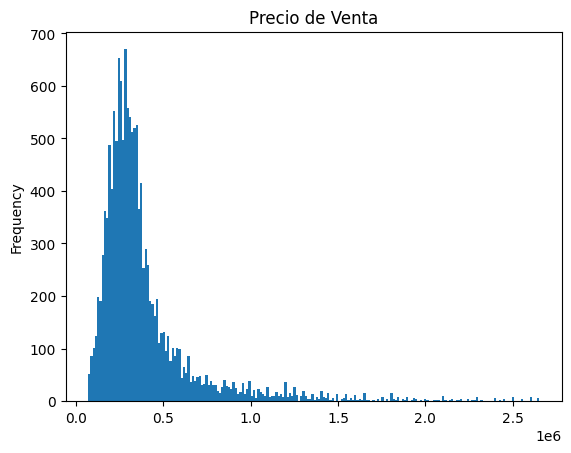

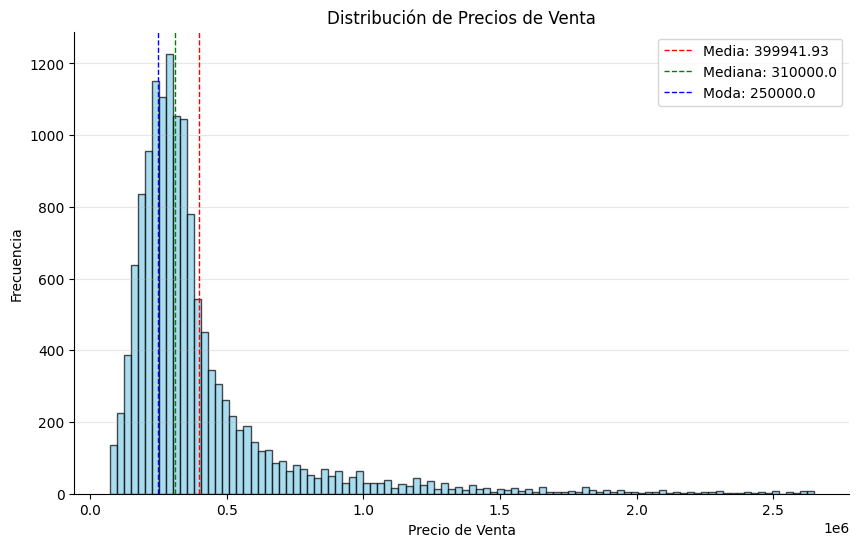

In [ ]:
# @title SALE_PRC

df['SALE_PRC'].plot(kind='hist', bins=200, title='Precio de Venta')

#crear grafico "histograma"
plt.figure(figsize=(10, 6))
plt.hist(df['SALE_PRC'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de Venta')
plt.grid(axis='y', alpha=0.3)
plt.gca().spines[['top', 'right',]].set_visible(False)


# Se calcula la media, mediana y moda
mean_SALE_PRC = df['SALE_PRC'].mean()
median_SALE_PRC = df['SALE_PRC'].median()
mode_SALE_PRC = df['SALE_PRC'].mode()[0]  # Mode might have multiple values

# Se suman como líneas verticales la media, mediana y moda al histograma
plt.axvline(mean_SALE_PRC, color='red', linestyle='dashed', linewidth=1, label=f'Media: {mean_SALE_PRC:.2f}')
plt.axvline(median_SALE_PRC, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {median_SALE_PRC}')
plt.axvline(mode_SALE_PRC, color='blue', linestyle='dashed', linewidth=1, label=f'Moda: {mode_SALE_PRC}')

plt.legend()
plt.show()


plt.show()

<font color='red'> En esta segunda parte estás trabajando con el dataset completo, lo que me parece un acierto.

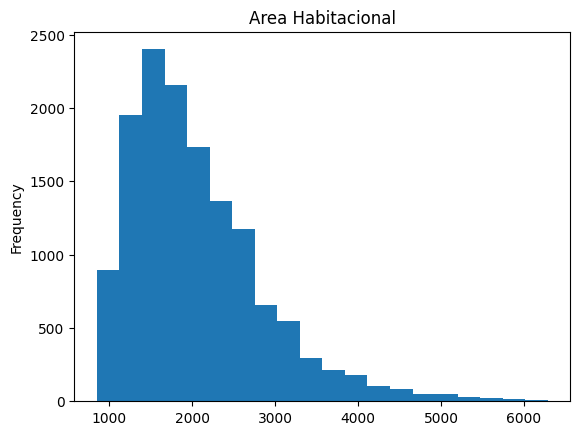

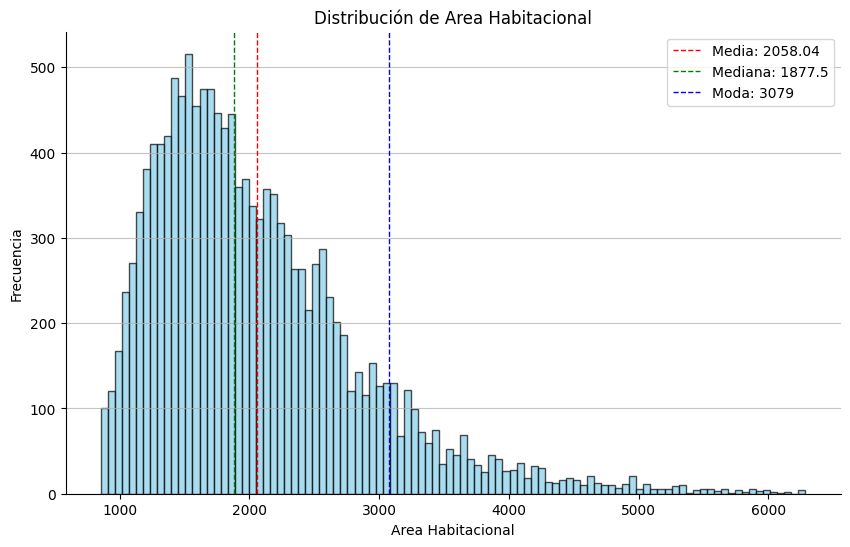

In [ ]:
# @title TOT_LVG_AREA

df['TOT_LVG_AREA'].plot(kind='hist', bins=20, title='Area Habitacional')

#crear grafico "histograma"
plt.figure(figsize=(10, 6))
plt.hist(df['TOT_LVG_AREA'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Area Habitacional')
plt.ylabel('Frecuencia')
plt.title('Distribución de Area Habitacional')
plt.grid(axis='y', alpha=0.75)
plt.gca().spines[['top', 'right',]].set_visible(False)


# Se calcula la media, mediana y moda
mean_TOT_LVG_AREA = df['TOT_LVG_AREA'].mean()
median_TOT_LVG_AREA = df['TOT_LVG_AREA'].median()
mode_TOT_LVG_AREA = df['TOT_LVG_AREA'].mode()[0]  # Mode might have multiple values

# Se suman como líneas verticales la media, mediana y moda al histograma
plt.axvline(mean_TOT_LVG_AREA, color='red', linestyle='dashed', linewidth=1, label=f'Media: {mean_TOT_LVG_AREA:.2f}')
plt.axvline(median_TOT_LVG_AREA, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {median_TOT_LVG_AREA}')
plt.axvline(mode_TOT_LVG_AREA, color='blue', linestyle='dashed', linewidth=1, label=f'Moda: {mode_TOT_LVG_AREA}')

plt.legend()
plt.show()

 <font color='red'> Excelente histograma + medidas de dispersión

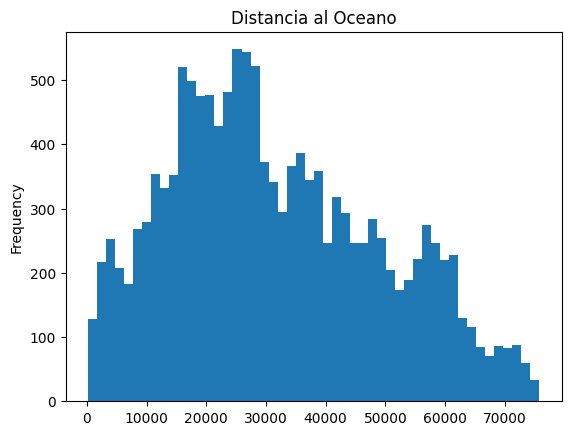

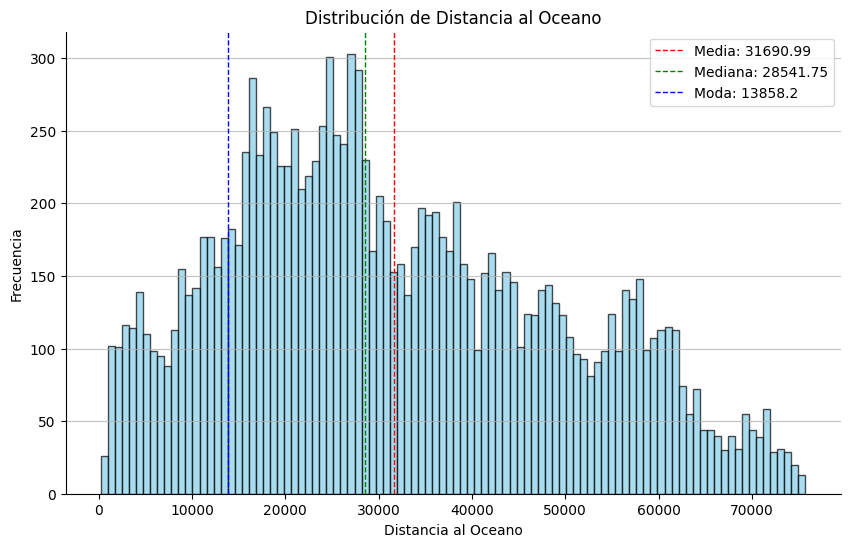

In [ ]:
# @title OCEAN_DIST

df['OCEAN_DIST'].plot(kind='hist', bins=50, title='Distancia al Oceano')

#crear grafico "histograma"
plt.figure(figsize=(10, 6))
plt.hist(df['OCEAN_DIST'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Distancia al Oceano')
plt.ylabel('Frecuencia')
plt.title('Distribución de Distancia al Oceano')
plt.grid(axis='y', alpha=0.75)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Se calcula la media, mediana y moda
mean_OCEAN_DIST = df['OCEAN_DIST'].mean()
median_OCEAN_DIST = df['OCEAN_DIST'].median()
mode_OCEAN_DIST = df['OCEAN_DIST'].mode()[0]  # Mode might have multiple values

# Se suman como líneas verticales la media, mediana y moda al histograma
plt.axvline(mean_OCEAN_DIST, color='red', linestyle='dashed', linewidth=1, label=f'Media: {mean_OCEAN_DIST:.2f}')
plt.axvline(median_OCEAN_DIST, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {median_OCEAN_DIST}')
plt.axvline(mode_OCEAN_DIST, color='blue', linestyle='dashed', linewidth=1, label=f'Moda: {mode_OCEAN_DIST}')

plt.legend()
plt.show()

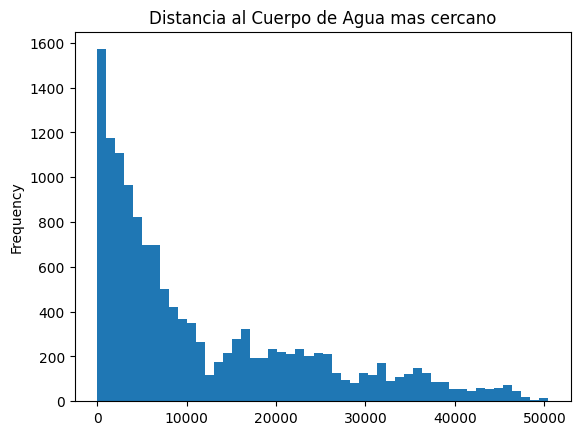

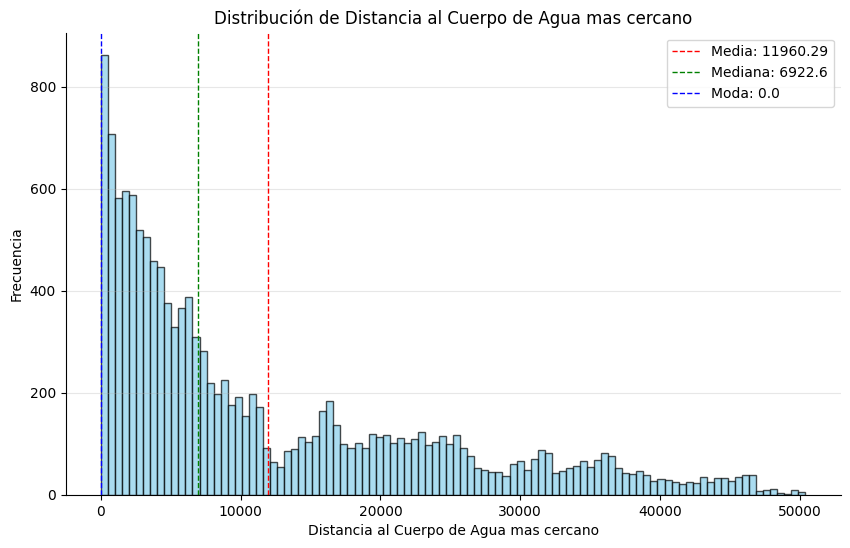

In [ ]:
# @title WATER_DIST

df['WATER_DIST'].plot(kind='hist', bins=50, title='Distancia al Cuerpo de Agua mas cercano')

#crear grafico "histograma"
plt.figure(figsize=(10, 6))
plt.hist(df['WATER_DIST'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Distancia al Cuerpo de Agua mas cercano')
plt.ylabel('Frecuencia')
plt.title('Distribución de Distancia al Cuerpo de Agua mas cercano')
plt.grid(axis='y', alpha=0.3)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Se calcula la media, mediana y moda
mean_WATER_DIST = df['WATER_DIST'].mean()
median_WATER_DIST = df['WATER_DIST'].median()
mode_WATER_DIST = df['WATER_DIST'].mode()[0]  # Mode might have multiple values

# Se suman como líneas verticales la media, mediana y moda al histograma
plt.axvline(mean_WATER_DIST, color='red', linestyle='dashed', linewidth=1, label=f'Media: {mean_WATER_DIST:.2f}')
plt.axvline(median_WATER_DIST, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {median_WATER_DIST}')
plt.axvline(mode_WATER_DIST, color='blue', linestyle='dashed', linewidth=1, label=f'Moda: {mode_WATER_DIST}')

plt.legend()
plt.show()

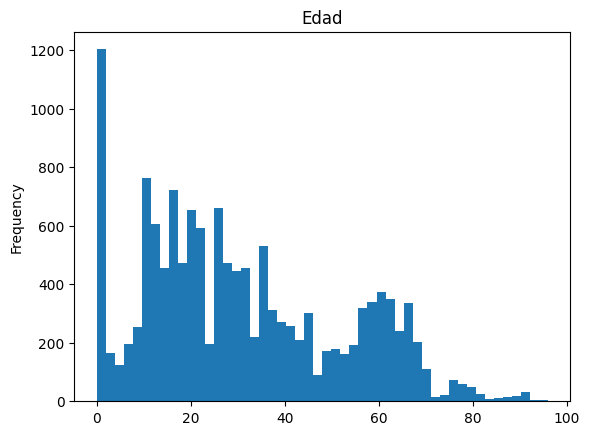

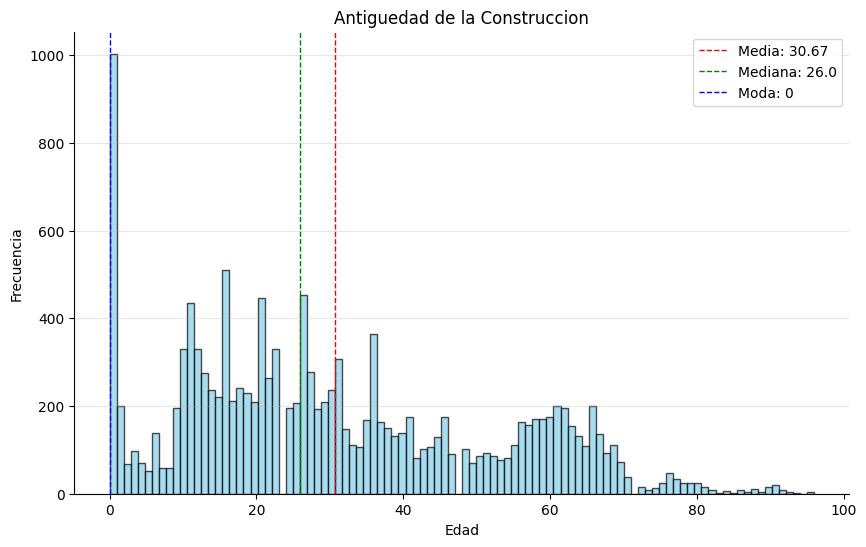

In [ ]:
# @title age

df['age'].plot(kind='hist', bins=50, title='Edad')

#crear grafico "histograma"
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Antiguedad de la Construccion')
plt.grid(axis='y', alpha=0.3)
plt.gca().spines[['top', 'right',]].set_visible(False)


# Se calcula la media, mediana y moda
mean_age = df['age'].mean()
median_age = df['age'].median()
mode_age = df['age'].mode()[0]  # Mode might have multiple values

# Se suman como líneas verticales la media, mediana y moda al histograma
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label=f'Media: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {median_age}')
plt.axvline(mode_age, color='blue', linestyle='dashed', linewidth=1, label=f'Moda: {mode_age}')

plt.legend()
plt.show()

 <font color='red'> Tenés muchas propiedades con una edad de 0. ¿Se trata de propiedades con menos de un año, de errores o de propiedades para las cuales no hay información, es decir, valores perdidos? En la fuente del dataset puede haber pistas sobre esto:

In [ ]:
df[df['age'] == 0].shape

(1003, 17)

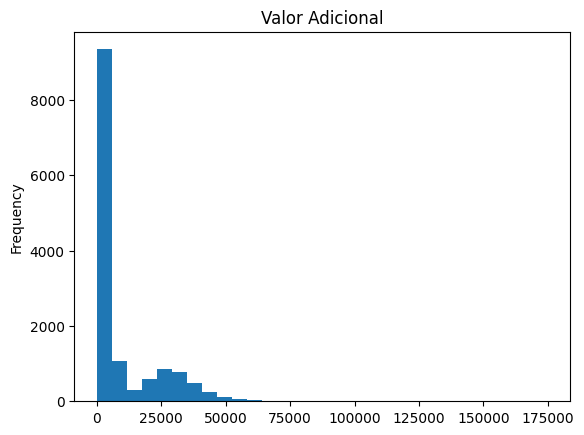

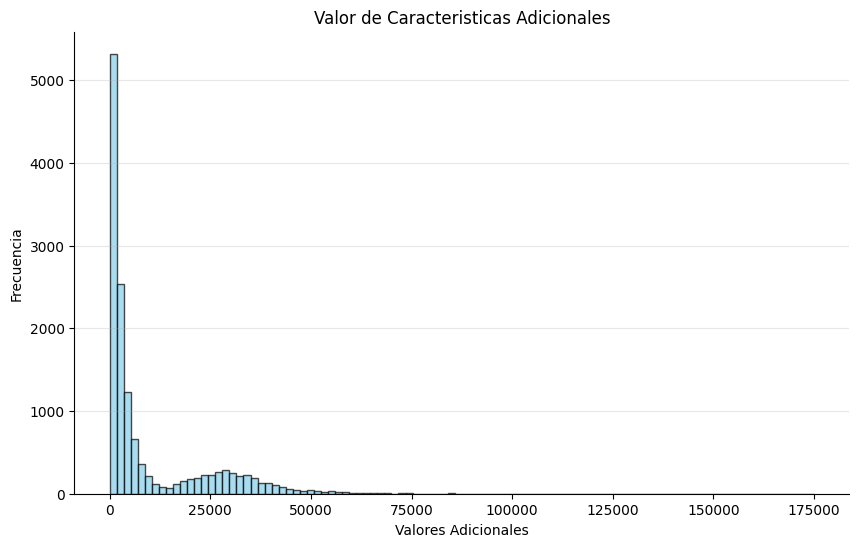

In [ ]:
# @title SPEC_FEAT_VAL

df['SPEC_FEAT_VAL'].plot(kind='hist', bins=30, title='Valor Adicional')

#crear grafico "histograma"
plt.figure(figsize=(10, 6))
plt.hist(df['SPEC_FEAT_VAL'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Valores Adicionales')
plt.ylabel('Frecuencia')
plt.title('Valor de Caracteristicas Adicionales')
plt.grid(axis='y', alpha=0.3)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

# Informacion del Dataset

##Descripcion de Variables y Dominio

1. PARCELNO: identificador único de cada propiedad.
2. SALE_PRC: precio de venta
3. LND_SQFOOT: area del terreno (pies cuadrados)
4. TOT_LVG_AREA: área del piso (pies cuadrados)
5. SPEC_FEAT_VAL: valor de las características especiales (por ejemplo, piscinas)
6. RAIL_DIST: distancia a la línea ferroviaria más cercana (un indicador de ruido) (pies)
7. OCEAN_DIST: distancia al océano (pies)
8. WATER_DIST: distancia al cuerpo de agua más cercano (pies)
9. CNTR_DIST: distancia al distrito comercial central de Miami (pies)
10. SUBCNTR_DI: distancia al subcentro más cercano (pies)
11. HWY_DIST: distancia a la autopista más cercana (un indicador de ruido) (pies)
12. edad: edad de la estructura
13. avno60plus: variable ficticia para el ruido de los aviones que excede un nivel aceptable
14. structure_quality: calidad de la estructura
15. month_sold: mes de venta en 2016
16. LATITUD
17. LONGITUD

##Identificacion de Outliers

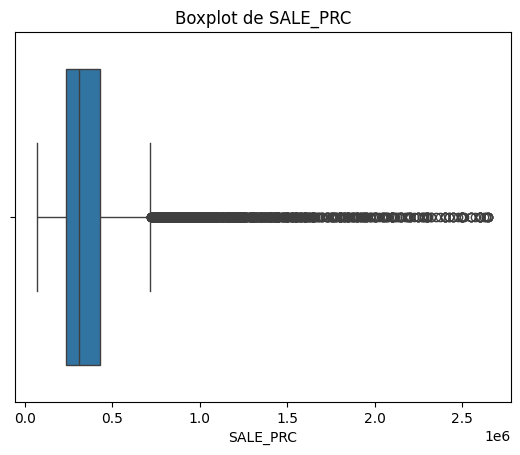

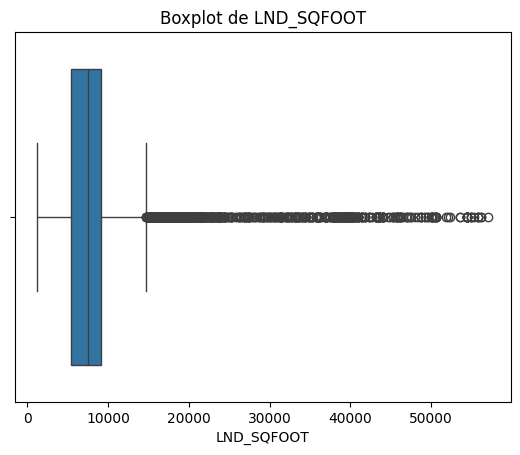

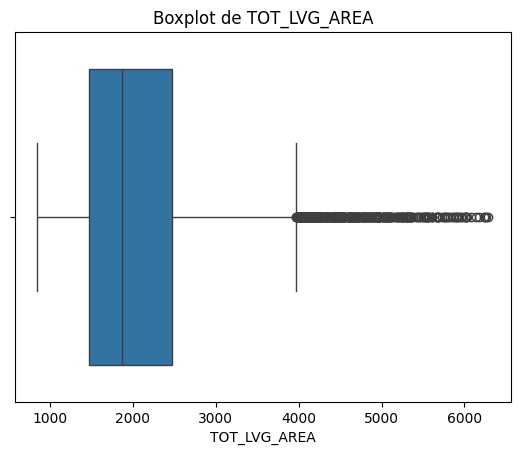

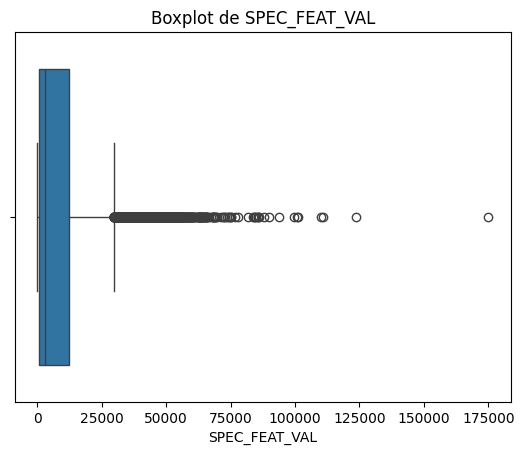

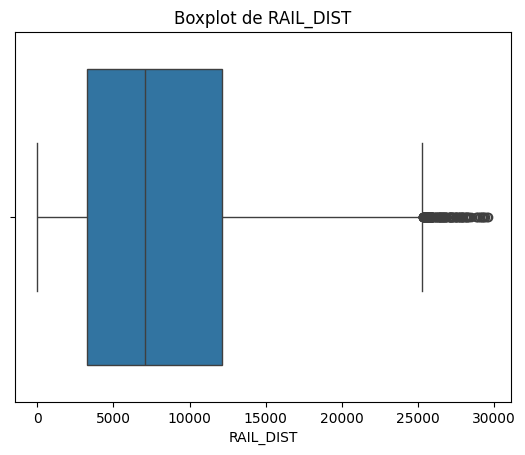

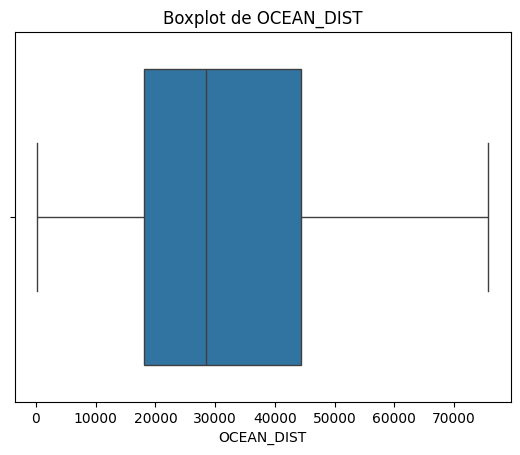

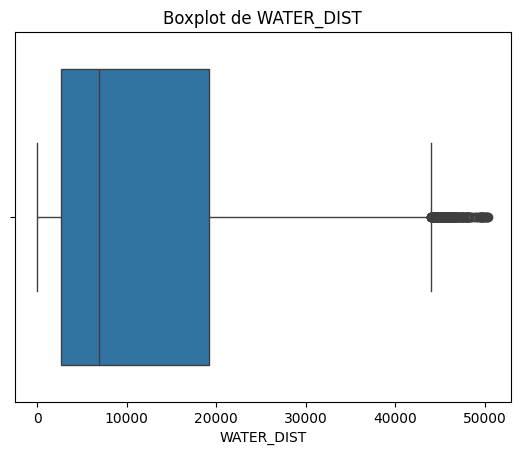

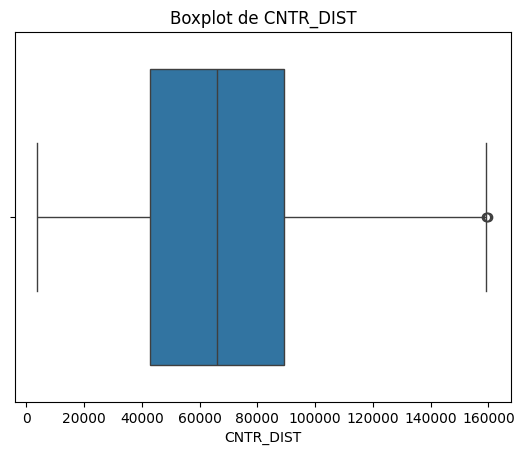

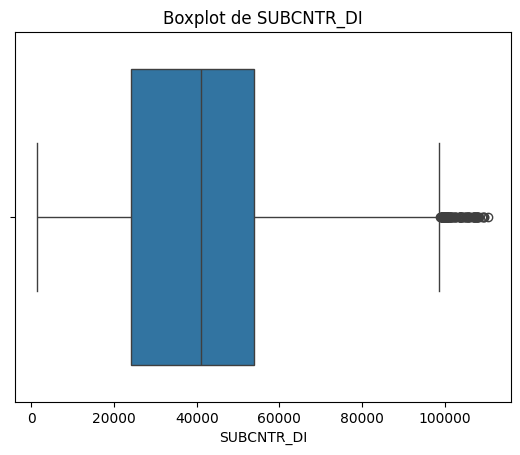

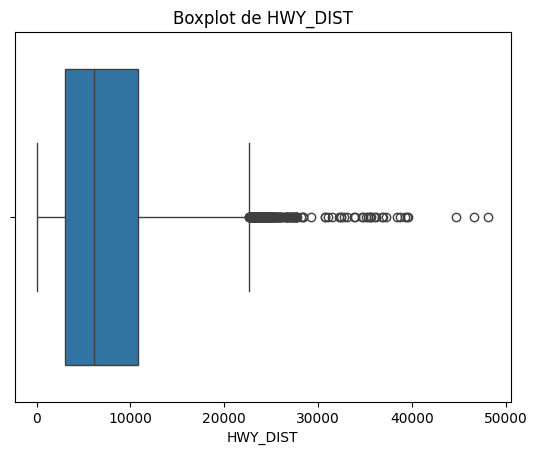

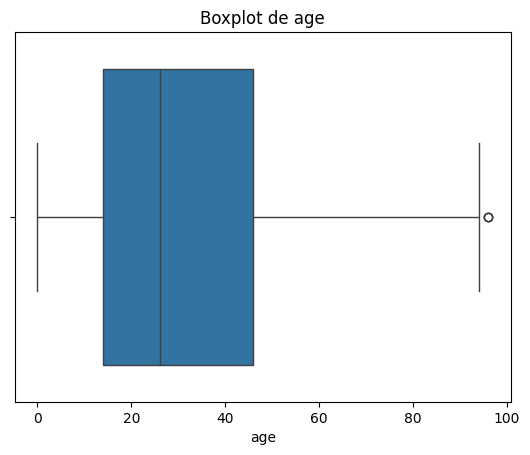

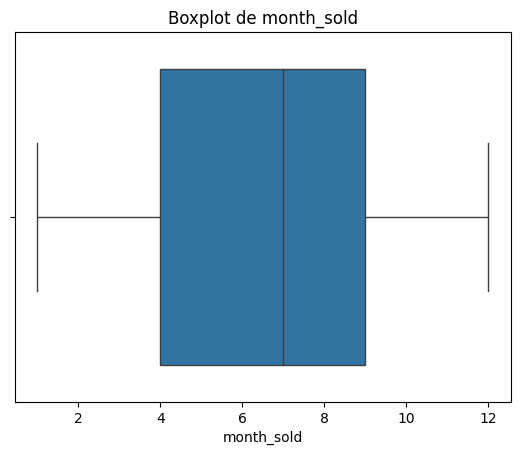

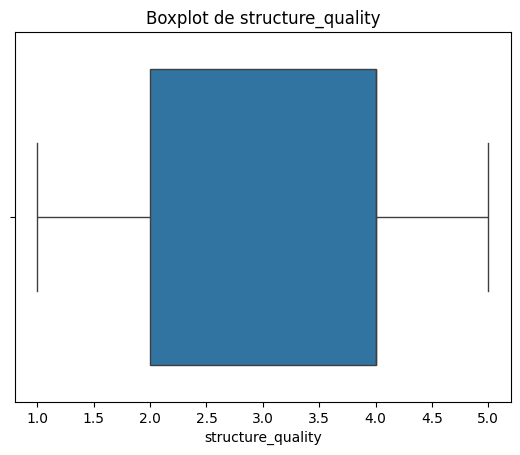

Registros con outliers:
        LATITUDE  LONGITUDE       PARCELNO   SALE_PRC  LND_SQFOOT  \
2      25.891334 -80.153740   622280100470   800000.0        9375   
3      25.891765 -80.152657   622280100530   988000.0       12450   
4      25.891825 -80.154639   622280100200   755000.0       12800   
6      25.892473 -80.157217   622280080100  1020000.0       10387   
7      25.893019 -80.157426   622280080400   850000.0       10272   
...          ...        ...            ...        ...         ...   
13809  25.622745 -80.430275  3059270130030   340000.0       13989   
13811  25.624716 -80.428378  3059270131580   350000.0        8559   
13835  25.621488 -80.420679  3059270060310   310000.0        7502   
13857  25.624401 -80.420218  3059270301630   345000.0        5000   
13918  25.609801 -80.381249  3050310210910   255000.0       15000   

       TOT_LVG_AREA  SPEC_FEAT_VAL  RAIL_DIST  OCEAN_DIST  WATER_DIST  \
2              2276          49206     4412.9     10574.1       297.1   
3

In [ ]:
numericas = ['SALE_PRC','LND_SQFOOT','TOT_LVG_AREA','SPEC_FEAT_VAL','RAIL_DIST','OCEAN_DIST','WATER_DIST','CNTR_DIST','SUBCNTR_DI','HWY_DIST','age','month_sold','structure_quality']

# la variable structure_quality se consideraria una variable numerica o categorica?

for column in numericas:
    sns.boxplot(x=df[column])
    plt.title("Boxplot de " + column)
    plt.xlabel(column)
    plt.show()

#rango entre cuartiles
Q1 = df[numericas].quantile(0.25)
Q3 = df[numericas].quantile(0.75)
IQR = Q3 - Q1

# Identificar los outliers
outliers = ((df[numericas] < (Q1 - 1.5 * IQR)) | (df[numericas] > (Q3 + 1.5 * IQR))).any(axis=1)

# Mostrar los registros que contienen outliers
outlier_rows = df[outliers]
print("Registros con outliers:")
print(outlier_rows)

 <font color='red'> Perfecto. Recordá que los outliers no son necesariamente datos erróneos. Hay variables que naturalmente tienen distribuciones más atípicas, por ejemplo, salarios, precios.

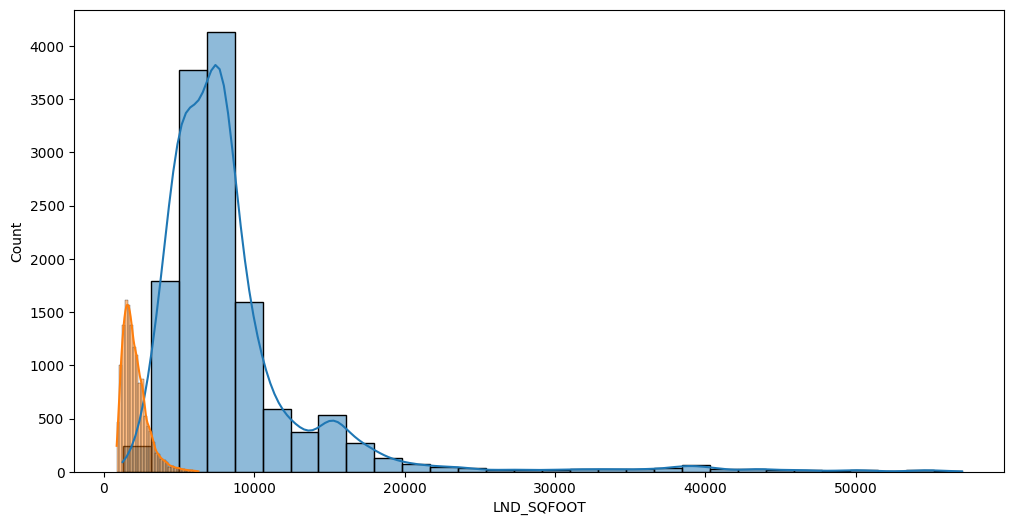

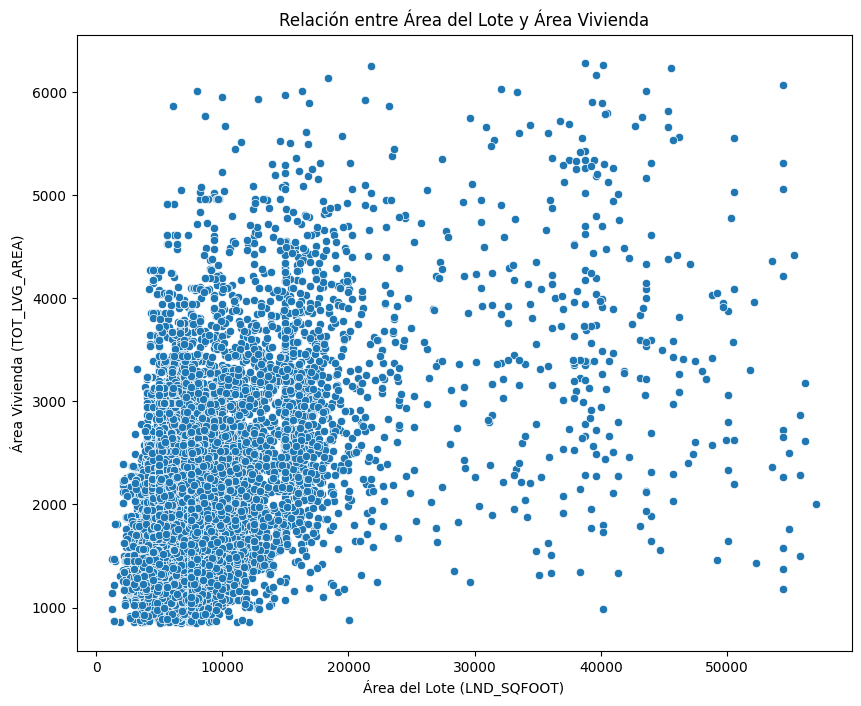

In [ ]:
# @title LND_SQFOOT & TOT_LVG_AREA

# Histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='LND_SQFOOT', bins=30, kde=True)
sns.histplot(data=df, x='TOT_LVG_AREA', bins=30, kde=True)
plt.show()

# Diagrama de dispersión
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='LND_SQFOOT', y='TOT_LVG_AREA')
plt.xlabel('Área del Lote (LND_SQFOOT)')
plt.ylabel('Área Vivienda (TOT_LVG_AREA)')
plt.title('Relación entre Área del Lote y Área Vivienda')
plt.show()

 <font color='red'> Recordá poner toda la información en tus gráficos, por ejemplo, qué está en naranja y qué en azul en el primero.

In [ ]:
# Correlación
correlation = df['LND_SQFOOT'].corr(df['TOT_LVG_AREA'])
print("Correlación:", correlation)

# Estadísticas descriptivas
print(df[['LND_SQFOOT', 'TOT_LVG_AREA']].describe())

Correlación: 0.43747246339968743
         LND_SQFOOT  TOT_LVG_AREA
count  13932.000000  13932.000000
mean    8620.879917   2058.044574
std     6070.088742    813.538535
min     1248.000000    854.000000
25%     5400.000000   1470.000000
50%     7500.000000   1877.500000
75%     9126.250000   2471.000000
max    57064.000000   6287.000000


Correlación: El coeficiente de correlación de Pearson es de 0.43747246339968743, lo cual indica una correlación positiva moderada entre el área del lote (LND_SQFOOT) y el área habitable (TOT_LVG_AREA). Esto significa que, en general, a medida que aumenta el tamaño del lote, también tiende a aumentar el tamaño de la vivienda.


Media: El área promedio del lote es de 8620.88 pies cuadrados y el área habitable promedio es de 2058.04 pies cuadrados.

Desviación estándar: La desviación estándar indica la dispersión de los datos alrededor de la media. la desviación estándar tanto de LND_SQFOOT como de TOT_LVG_AREA es considerable. Esto significa que existe una gran variabilidad en los tamaños de los lotes y las viviendas. Hay lotes y casas mucho más grandes y mucho más pequeñas que el promedio. Lo que demuestra que el conjunto de datos es heterogéneo, es decir, no todos los datos son similares; por consiguiente, una alta variabilidad puede dificultar la identificación de patrones y relaciones claras entre las variables.

Mínimo y máximo: Los valores mínimo y máximo nos dan una idea de los rangos de los datos. El lote más pequeño tiene 1248 pies cuadrados y el más grande 57064 pies cuadrados.


<Axes: >

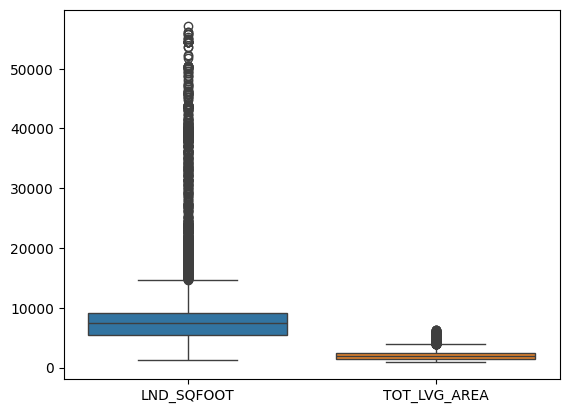

In [ ]:
# box plot
sns.boxplot(data=df[['LND_SQFOOT', 'TOT_LVG_AREA']])

 <font color='red'> Ileana, muy bueno tu trabajo. Algunos comentarios:

<font color='red'> Primero, no logré entender los agrupamientos de datos en la primera parte, ¿cuál es la razón? ¿cuál termina siendo tu unidad de análisis, es decir, qué es cada fila? En la segunda parte luego del planteamiento de hipótesis trabajás con el dataset entero, lo cual me parece correcto.

<font color='red'> Segundo, recordá que a veces hay valores perdidos ocultos; por ejemplo, ¿qué pasa en el caso de propiedades con edad de 0?

<font color='red'> El abstract y el marco del problema están muy bien. Efectivamente, el objetivo de un proyecto de Data Science es entrenar un modelo para realizar una predicción o estimación, en este caso, del precio.

 <font color='red'> Por lo tanto, te puede resultar útil enfocar tu análisis en el precio. ¿Cómo se vincula el precio con tus otras variables, hay relaciones fuertes? Por ejemplo entre precio + distancia a océano, precio + distancia a cuerpos de agua, precio + área total, precio +  calidad de la estructura, precio+ distancia a autopista, precio + distancia a circuito comercial. Visualizar estos cruces te puede dar pistas sobre qué variables van a ser más importantes en tu modelo.

<font color='red'> Espero que estos comentarios te sirvan para avanzar en la segunda parte del curso y en el proyecto final.

 <font color='red'> Si te queda alguna duda me escribís y lo vemos!